# Importing Libraries usefull in project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading our data

In [3]:
df=pd.read_csv('loan_prediction.csv')

df.head()
# for looking at top 5 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()
# for looking at last 5 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# checking shape of data

df.shape

(614, 13)

In [6]:
# looking at the type of data for each column

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
# To know the name of columns

df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df.info()
# geting data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
# lets check for null values in data

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

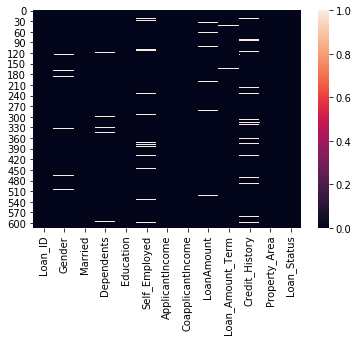

In [11]:
# checking null values graphically

sns.heatmap(df.isnull())

In [12]:
#  from above we can see that there are lot of null value present in our data
# So lets treat the null values first by filling them with there forward values.

df_new=df.fillna(method='ffill')

In [13]:
# now check null values

df_new.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
# there is still 1 null value present, so treat this one also with filling with its before values.

df_new=df_new.fillna(method='bfill')

In [15]:
df_new.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now there  no null value present in our data

In [16]:
# Getting some statistical features of data

df_new.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,147.350163,341.628664,0.835505
std,6109.041673,2926.248369,87.444391,65.656819,0.371027
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,167.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


From this we can easily see that there is huge difference between the 75 percentile and max values in 4 columns hence outliers are present n our data.

Lets check this graphically by Boxplot

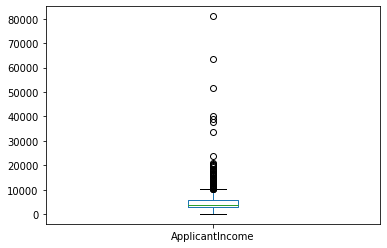

In [19]:
df_new['ApplicantIncome'].plot.box()

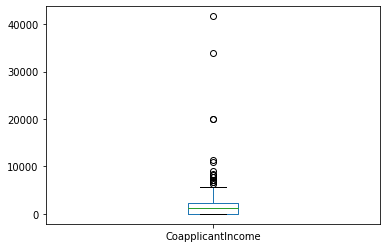

In [20]:
df_new['CoapplicantIncome'].plot.box()

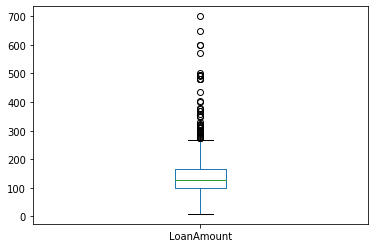

In [21]:
df_new['LoanAmount'].plot.box()

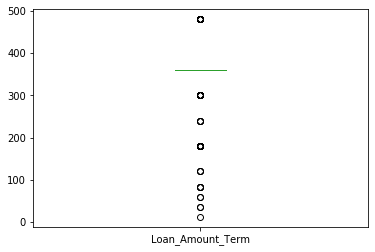

In [22]:
df_new['Loan_Amount_Term'].plot.box()

From the above plots we can see that there are outliers in our data.
we will remove it later.

# Univariate Analysis

In [30]:
df_cat=df[['Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Property_Area', 'Loan_Status']].copy()

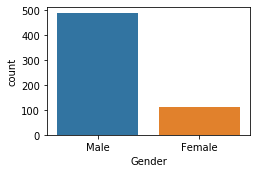

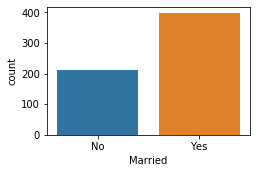

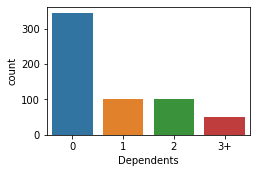

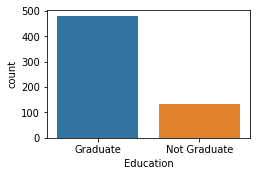

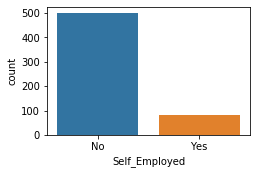

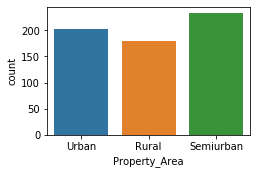

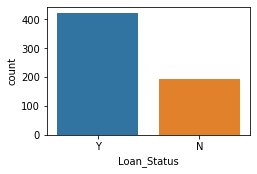

In [35]:
for i in df_cat:
    plt.figure(figsize=(8,8))
    plt.subplot(325)
    sns.countplot(df_cat[i])

# Bivariant Analysis

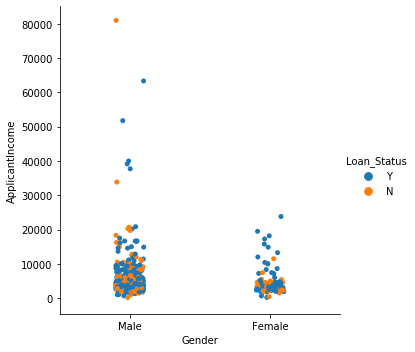

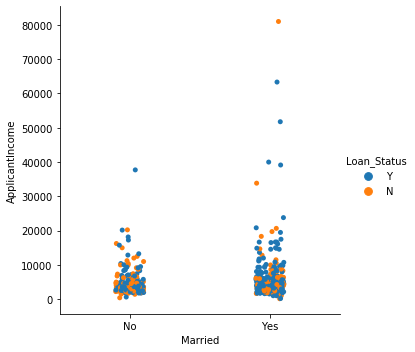

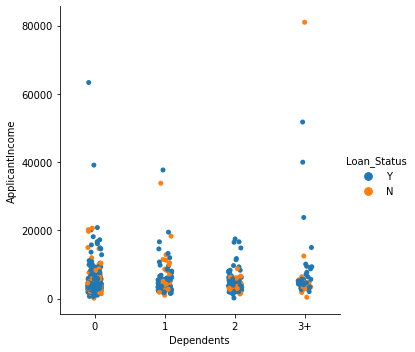

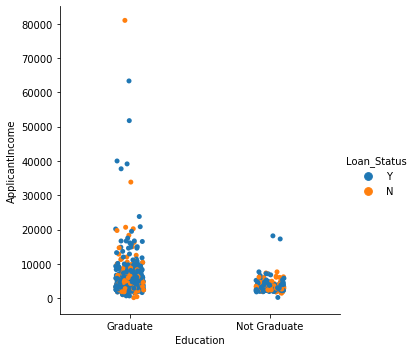

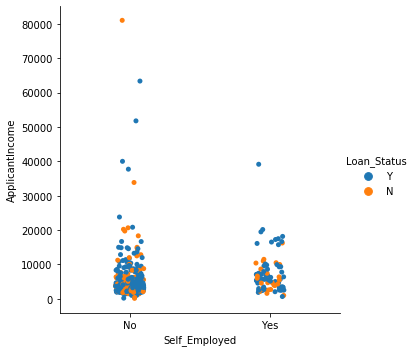

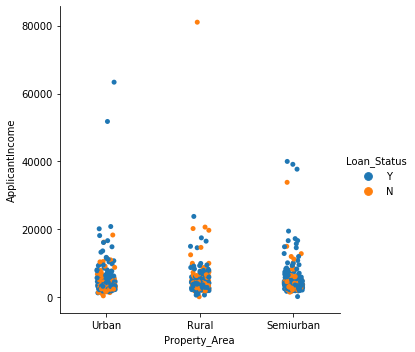

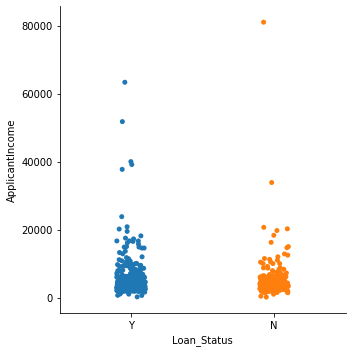

In [37]:
for i in df_cat:
    sns.catplot(x=i, y='ApplicantIncome',hue='Loan_Status',data=df_new)

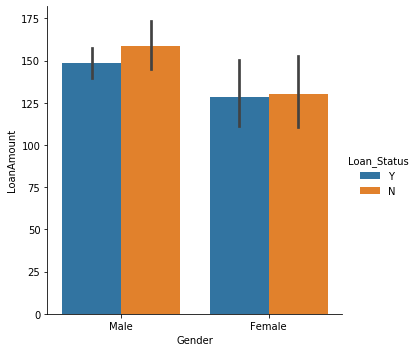

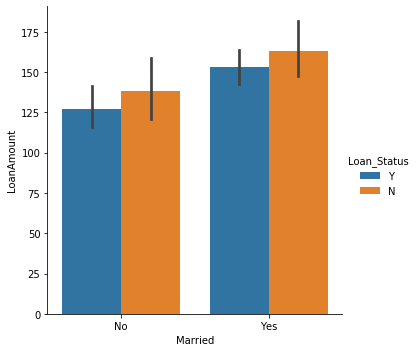

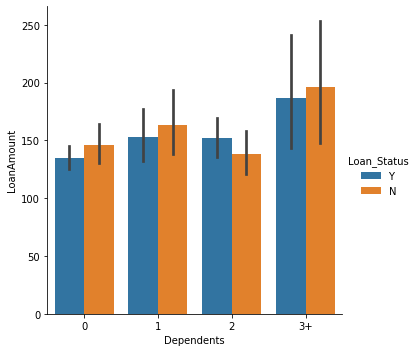

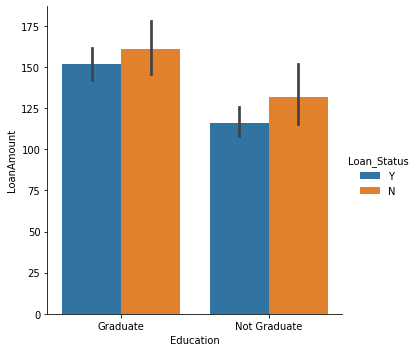

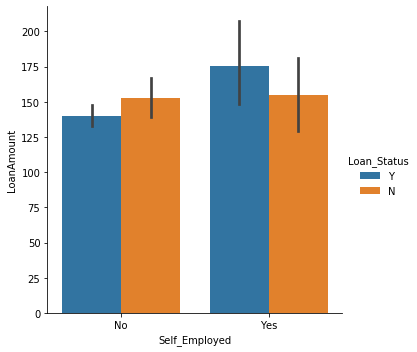

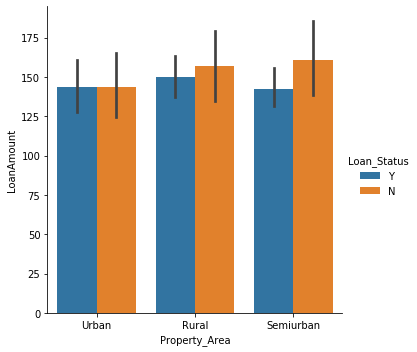

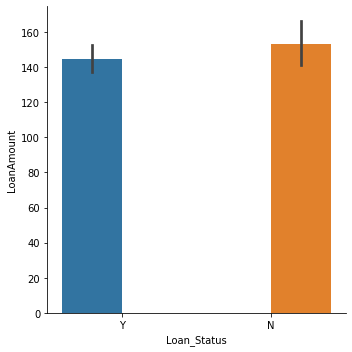

In [38]:
for i in df_cat:
    sns.catplot(x=i, y='LoanAmount',hue='Loan_Status',data=df_new,kind='bar')

# Preprocessing the data

In [39]:
# importing library to encode string varibles into integers

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df_new['Gender']=le.fit_transform(df_new['Gender'])
df_new['Married']=le.fit_transform(df_new['Married'])
df_new['Dependents']=le.fit_transform(df_new['Dependents'])
df_new['Education']=le.fit_transform(df_new['Education'])
df_new['Self_Employed']=le.fit_transform(df_new['Self_Employed'])
df_new['Property_Area']=le.fit_transform(df_new['Property_Area'])
df_new['Loan_Status']=le.fit_transform(df_new['Loan_Status'])

In [40]:
df_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [41]:
df_new.shape

(614, 13)

In [44]:
# Checking the data type

df_new.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [46]:
# droping Loan_ID column as its of no use

df_new.drop(['Loan_ID'],axis=1,inplace=True)
print(df_new.shape)

(614, 12)


In [74]:
# Now removing outliers from data.

from scipy import stats
df_new_1=df_new[(np.abs(stats.zscore(df_new)) < 3).all(axis=1)]
print(df_new.shape)          # old data shape
print(df_new_1.shape)        # new data shape 

(614, 12)
(577, 12)


After removing outliers we are left with 577 Rows now

In [75]:
df=df_new_1

In [76]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D8DEF7748>,
      dtype=object)

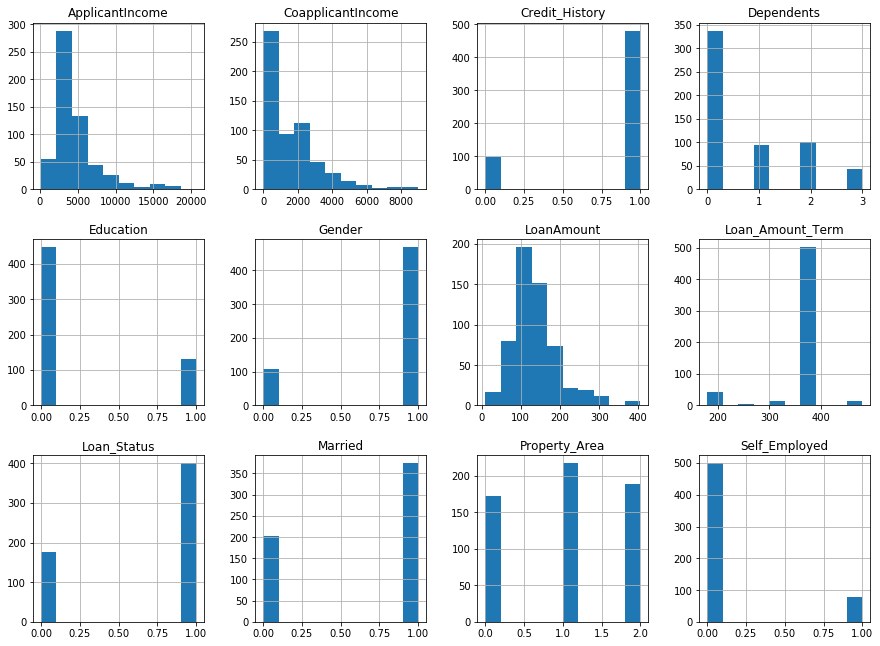

In [77]:
df.hist(figsize=(15,15),layout=(4,4))

In [78]:
df_1=df.skew()
df_1

Gender              -1.608201
Married             -0.622219
Dependents           1.000113
Education            1.318454
Self_Employed        2.139517
ApplicantIncome      2.139848
CoapplicantIncome    1.364318
LoanAmount           1.306942
Loan_Amount_Term    -2.009805
Credit_History      -1.779605
Property_Area       -0.049183
Loan_Status         -0.840271
dtype: float64

In [80]:
# Lets divide the data in to  input and target variables

x=df.drop(["Loan_Status"],axis=1)

y=df["Loan_Status"]


In [81]:
# normalizing the data

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

# Importing Libraries for model selection


In [92]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [93]:
print(x_train.shape,x_test.shape)

(461, 11) (116, 11)


In [94]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=50)
GNB=GaussianNB()
RFC=RandomForestClassifier(random_state=50)
GBC=GradientBoostingClassifier(random_state=50)
ABC=AdaBoostClassifier(random_state=50)

In [95]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')



Accuracy_score =  0.8362068965517241



Cross_Val_Score =  0.7886267392619479



roc_auc_score =  0.7267441860465116



classification_report
               precision    recall  f1-score   support

           0       0.79      0.50      0.61        30
           1       0.85      0.95      0.90        86

    accuracy                           0.84       116
   macro avg       0.82      0.73      0.75       116
weighted avg       0.83      0.84      0.82       116




Confusion_Matrix
 [[15 15]
 [ 4 82]]



AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=

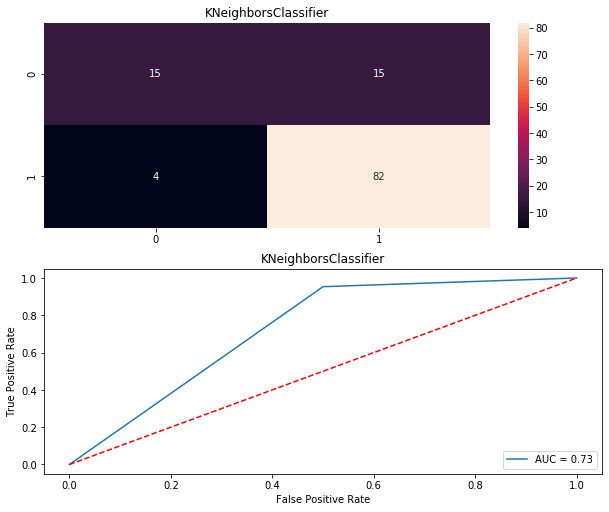

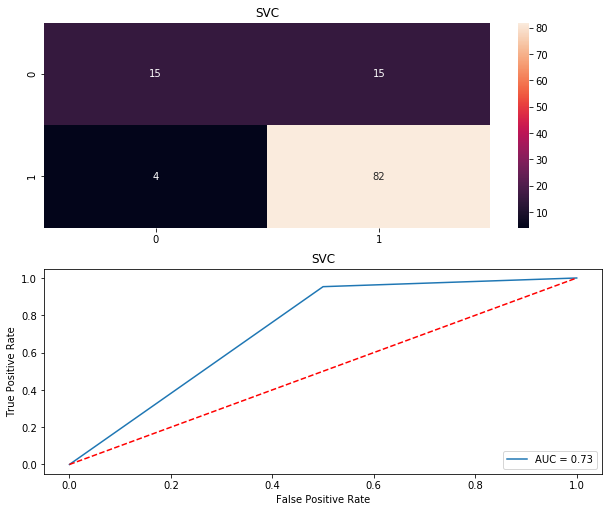

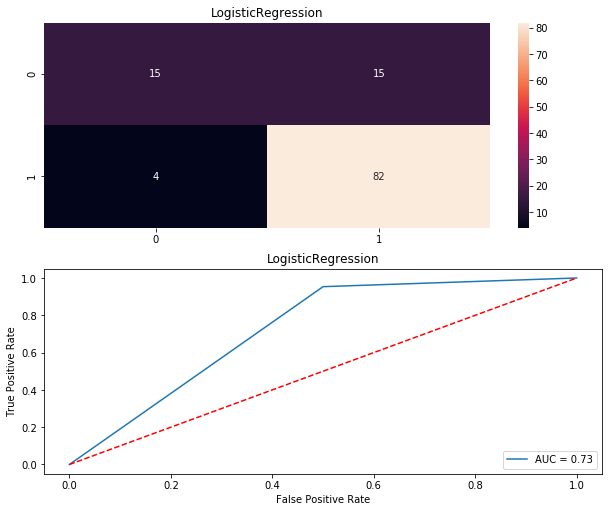

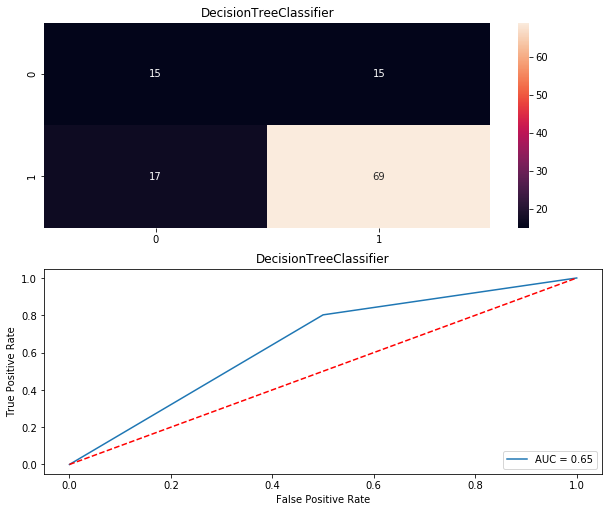

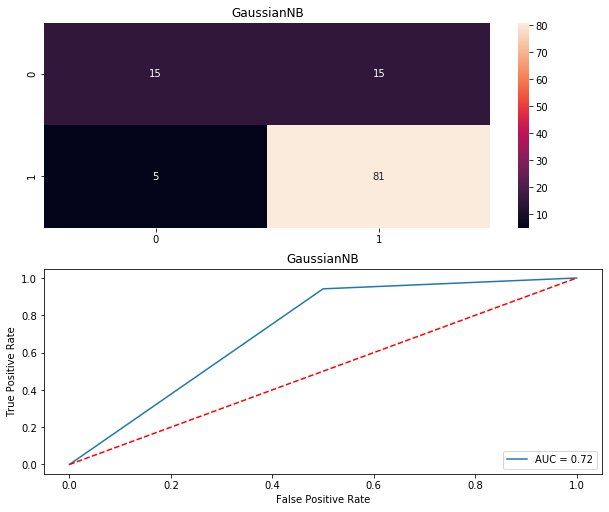

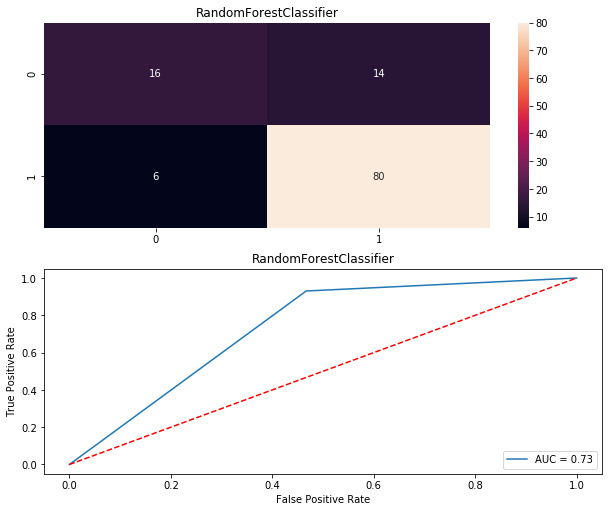

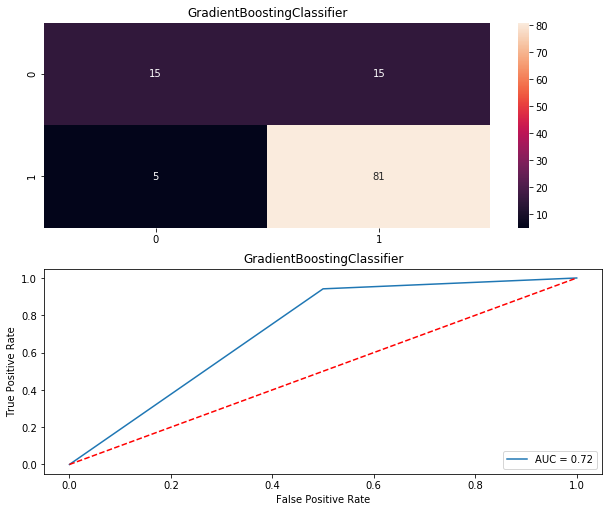

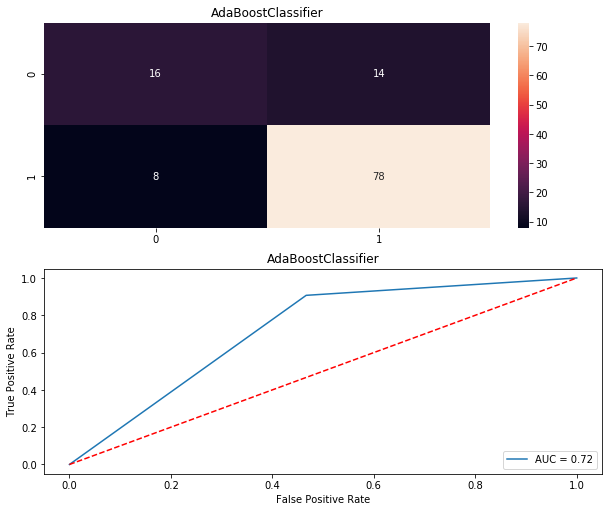

In [96]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n\n')
    print('classification_report\n',classification_report(y_test,pred))
    print('\n\n')
    cm=confusion_matrix(y_test,pred)
    print('Confusion_Matrix\n',cm)
    print('\n\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [97]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,83.620690,78.862674,72.674419
1,SVC,83.620690,81.993345,72.674419
2,LogisticRegression,83.620690,81.993345,72.674419
3,DecisionTreeClassifier,72.413793,71.600121,65.116279
4,GaussianNB,82.758621,81.642468,72.093023
5,RandomForestClassifier,82.758621,79.918330,73.178295
6,GradientBoostingClassifier,82.758621,79.225650,72.093023
7,AdaBoostClassifier,81.034483,79.395039,72.015504


From this result we can select Logistic Regression or SVC as our final model as it has highest Accuracy and cross value score.

In [104]:
# for saving our model

from sklearn.externals import joblib
joblib.dump(LR,'Fraud_Lone_Prediction.obj')

['Fraud_Lone_Prediction.obj']

In [106]:
model=joblib.load('Fraud_Lone_Prediction.obj')
model.predict(x_test)    

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1])

# Complete